<a href="https://colab.research.google.com/github/Geeks-Louiz/GoMycode-Exercice/blob/master/Checkpoint1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import  numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix #for model evaluation
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve #for model evaluation







In [ ]:
# to show only 5 first lines
data = pd.read_csv('/content/heart.csv')
print (data.head(5))

   age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0   63    1   3       145   233    1  ...      0      2.3      0   0     1       1
1   37    1   2       130   250    0  ...      0      3.5      0   0     2       1
2   41    0   1       130   204    0  ...      0      1.4      2   0     2       1
3   56    1   1       120   236    0  ...      0      0.8      2   0     2       1
4   57    0   0       120   354    0  ...      1      0.6      2   0     2       1

[5 rows x 14 columns]


In [ ]:
# Number of values for each attributes
print(data.nunique(axis=0))

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64


In [ ]:
# Checkin for missing values
print(data.isnull().sum())
print(data.isnull().values.any())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
False


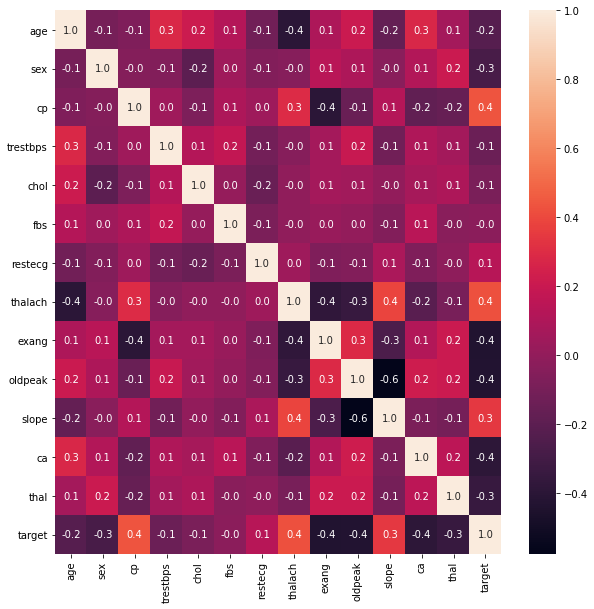

In [ ]:
#Data  Exploration 
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,fmt='.1f')
plt.show()

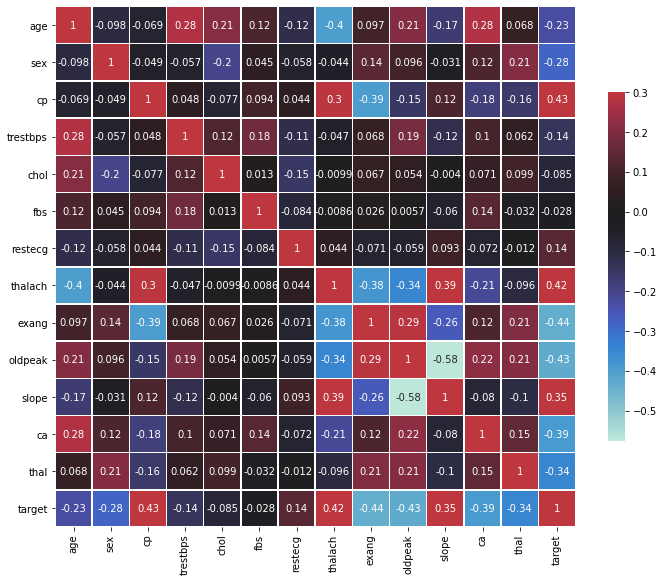

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)
plt.tight_layout()
plt.show()

In [ ]:
dataX=data.drop('target',axis=1)
dataY=data['target']
print(dataX)
print(dataY)

     age  sex  cp  trestbps  chol  ...  exang  oldpeak  slope  ca  thal
0     63    1   3       145   233  ...      0      2.3      0   0     1
1     37    1   2       130   250  ...      0      3.5      0   0     2
2     41    0   1       130   204  ...      0      1.4      2   0     2
3     56    1   1       120   236  ...      0      0.8      2   0     2
4     57    0   0       120   354  ...      1      0.6      2   0     2
..   ...  ...  ..       ...   ...  ...    ...      ...    ...  ..   ...
298   57    0   0       140   241  ...      1      0.2      1   0     3
299   45    1   3       110   264  ...      0      1.2      1   0     3
300   68    1   0       144   193  ...      0      3.4      1   2     3
301   57    1   0       130   131  ...      1      1.2      1   1     3
302   57    0   1       130   236  ...      0      0.0      1   1     2

[303 rows x 13 columns]
0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target

In [ ]:
# splitting data into test 20% and train 80% data 
X_train,X_test,y_train,y_test=train_test_split(dataX,dataY,test_size=0.2,random_state=42)


In [ ]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (242, 13)
X_test (61, 13)
y_train (242,)
y_test (61,)


In [ ]:
# Normalize data, scale data
x_train=(X_train-np.min(X_train))/(np.max(X_train)-np.min(X_train)).values
x_test=(X_test-np.min(X_test))/(np.max(X_test)-np.min(X_test)).values
print(x_train)
print(x_test)


          age  sex        cp  trestbps  ...   oldpeak  slope    ca      thal
132  0.270833  1.0  0.333333  0.265306  ...  0.000000    1.0  0.00  0.666667
202  0.604167  1.0  0.000000  0.571429  ...  0.142857    1.0  0.00  1.000000
196  0.354167  1.0  0.666667  0.571429  ...  0.642857    0.5  0.00  0.666667
75   0.541667  0.0  0.333333  0.418367  ...  0.250000    0.5  0.00  0.666667
176  0.645833  1.0  0.000000  0.234694  ...  0.250000    1.0  0.50  1.000000
..        ...  ...       ...       ...  ...       ...    ...   ...       ...
188  0.437500  1.0  0.666667  0.469388  ...  0.107143    0.5  0.25  1.000000
71   0.458333  1.0  0.666667  0.000000  ...  0.000000    1.0  0.25  1.000000
106  0.833333  1.0  1.000000  0.673469  ...  0.017857    0.5  0.25  0.666667
270  0.354167  1.0  0.000000  0.265306  ...  0.142857    1.0  0.00  1.000000
102  0.708333  0.0  0.333333  0.469388  ...  0.000000    1.0  0.50  0.666667

[242 rows x 13 columns]
          age  sex        cp  trestbps  ...   oldpe

In [ ]:
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred_i = knn.predict(X_test)
    print('Knn_iter_num',i)
    print(classification_report(y_test, y_pred_i))  # output accuracy

Knn_iter_num 1
              precision    recall  f1-score   support

           0       0.59      0.66      0.62        29
           1       0.66      0.59      0.62        32

    accuracy                           0.62        61
   macro avg       0.62      0.62      0.62        61
weighted avg       0.63      0.62      0.62        61

Knn_iter_num 2
              precision    recall  f1-score   support

           0       0.59      0.79      0.68        29
           1       0.73      0.50      0.59        32

    accuracy                           0.64        61
   macro avg       0.66      0.65      0.63        61
weighted avg       0.66      0.64      0.63        61

Knn_iter_num 3
              precision    recall  f1-score   support

           0       0.62      0.69      0.66        29
           1       0.69      0.62      0.66        32

    accuracy                           0.66        61
   macro avg       0.66      0.66      0.66        61
weighted avg       0.66      

In [ ]:
knn = KNeighborsClassifier(n_neighbors=14) #model
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))  # output accuracy

              precision    recall  f1-score   support

           0       0.71      0.76      0.73        29
           1       0.77      0.72      0.74        32

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61



[[22  7]
 [ 9 23]]
0.7377049180327869
Sensitivity :  0.7096774193548387
Specificity :  0.7666666666666667


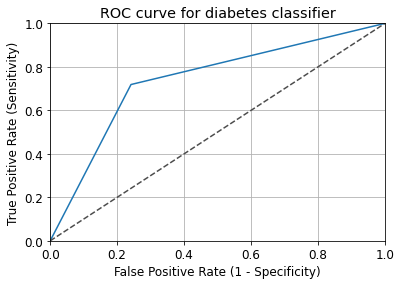

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print (cm)
print(accuracy_score(y_test, y_pred))
sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,1]+cm[0,1])
print('Specificity : ', specificity)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()


In [ ]:
# model shows that 22+23  correct predictions and 7+9 are incorrect
#The model predicted with 0.77377 accuracy. The model is more specific than sensitive.
